# ALY6140 Analytics Systems Technology Capstone
## Python Capstone Project for Las Vegas Trip advisor dataset

Goal of this capstone is to predict the Hotel score based on the number of reviews, useful reviews, hotel stars. 

Data extraction : Data is Las Vegas Trip Advisor Dataset extracted from Kaggle/UCI data.

Describe the dataset : This dataset includes quantitative and categorical features from online reviews from 21 hotels located in Las Vegas Strip, extracted from TripAdvisor
 
### Description of each data attribute from dataset 
User Country : Home country of the user who posted the review on TripAdvisor

No of Reviews: Total number of all reviews posted by the user on TripAdvisor

No of ReviewNum : Total number of all reviews the hotel being reviewed has received on TripAdvisor

HelpfulVotes : Total number of votes by other users considering the user’s review helpful

Score : User’s rating of the hotel by the user on the scale of 1 to 5, with 5 being the best rating possible.

Stay Period: Period of time in which the user stayed at the hotel being reviewed

Traveler type: Type of user who posted the review (business, couples, families, friends, solo)

Pool: Does the hotel has a pool? (YES/NO)

Gym: Does the hotel has a gym? (YES/NO)

Tennis: Does the hotel has a tennis court? (YES/NO)

Spa: Does the hotel has a spa? (YES/NO)

Casino: Does the hotel has a casino? (YES/NO)

Internet: Does the hotel provide free Internet? (YES/NO)

Hotel Name: Name of the hotel being reviewed

Stars: Hotel external rating (1 through 5 stars, with 5 being the best possible)

Capacity: Total number of rooms in the hotel being reviewed

Continent: Home continent of the user who posted the review on TripAdvisor

Length: Length of time the user who posted the review has been a member of TripAdvisor community

Review Month: The month (January through December) in which the user posted the review on TripAdvisor

Review Day: The day of the week (Sunday through Saturday) on which the user posted the review on TripAdvisor

Description of each data attribute created as part of data wrangling process

Average Rating: Average guest ratings

Facility Score: Total number of amenities offered by the hotel being reviewed (sum of “Pool”, “Gym”, “Tennis”, “Spa”, “Casino”, “FreeInternet”)

ReviewsReceived : Total number of reviews recevied by the hotel being reviewed (sum of “HReviewNum”)




Import all the libraries


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display
import seaborn as sns 
%matplotlib inline

### Data extraction

Read the values in excel in vegas dataframe and print the type of vegas
<br>

In [7]:
#Read the values from Excel
vegas = pd.read_csv("lasvegas_tripadvisor.csv")
print(type(vegas))
vegas.head()
#vegas.shape

<class 'pandas.core.frame.DataFrame'>


,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


### Data cleanup
Renaming the column names for convinience

In [8]:
vegas.columns = ['User_country', 'Nr_reviews', 'Nr_hotel_reviews', 'Helpful_votes',
       'Score', 'Period_of_stay', 'Traveler_type', 'Pool', 'Gym',
       'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'Hotel_name',
       'Hotel_stars', 'Nr_rooms', 'User_continent', 'Member_years',
       'Review_month', 'Review_weekday']
vegas.columns

Index(['User_country', 'Nr_reviews', 'Nr_hotel_reviews', 'Helpful_votes',
       'Score', 'Period_of_stay', 'Traveler_type', 'Pool', 'Gym',
       'Tennis_court', 'Spa', 'Casino', 'Free_internet', 'Hotel_name',
       'Hotel_stars', 'Nr_rooms', 'User_continent', 'Member_years',
       'Review_month', 'Review_weekday'],
      dtype='object')



Check for NA values in the given dataset cleaning up columns
Using isna().sum() we can see that there are no NA values in the columns


In [9]:
vegas.isna().sum()

User_country        0
Nr_reviews          0
Nr_hotel_reviews    0
Helpful_votes       0
Score               0
Period_of_stay      0
Traveler_type       0
Pool                0
Gym                 0
Tennis_court        0
Spa                 0
Casino              0
Free_internet       0
Hotel_name          0
Hotel_stars         0
Nr_rooms            0
User_continent      0
Member_years        0
Review_month        0
Review_weekday      0
dtype: int64

Describe the Dataset using describe function

The describe function below gives output for the minimum value of member years as -1806.000000, it is outlier and needs to be cleaned up

In [10]:
vegas.describe()

,Nr_reviews,Nr_hotel_reviews,Helpful_votes,Score,Hotel_stars,Nr_rooms,Member_years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,4.047619,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,0.844650,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,3.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


Drop/Delete the rows in Member_years that have negative values

In [11]:
df = vegas[vegas['Member_years']< 0].index.values.astype(int)[0]
vegas.drop(df, axis =0, inplace = True)
vegas.describe()

,Nr_reviews,Nr_hotel_reviews,Helpful_votes,Score,Hotel_stars,Nr_rooms,Member_years
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,48.192843,16.037773,31.783300,4.121272,4.047714,2195.013917,4.359841
std,75.058202,23.979751,48.563988,1.007544,0.845488,1286.389759,2.928725
min,1.000000,0.000000,0.000000,1.000000,3.000000,188.000000,0.000000
25%,12.000000,5.000000,8.000000,4.000000,3.000000,826.000000,2.000000
50%,24.000000,9.000000,16.000000,4.000000,4.000000,2700.000000,4.000000
75%,54.500000,18.000000,35.000000,5.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,5.000000,4027.000000,13.000000


Check the count of each columns check for NA values

In [12]:
vegas.User_country.value_counts(dropna = False)
#vegas

USA                     216
UK                       72
Canada                   65
Australia                36
Ireland                  13
India                    11
Mexico                    8
Germany                   7
Brazil                    5
Egypt                     5
New Zeland                5
Netherlands               4
Singapore                 4
Israel                    3
Malaysia                  3
Finland                   3
Thailand                  3
Norway                    3
Hawaii                    3
Scotland                  2
Costa Rica                2
Spain                     2
United Arab Emirates      2
Switzerland               2
Hungary                   1
South Africa              1
Phillippines              1
Puerto Rico               1
Kenya                     1
Taiwan                    1
Iran                      1
Croatia                   1
Honduras                  1
Swiss                     1
Kuwait                    1
Syria               

In [13]:
vegas.dtypes

User_country        object
Nr_reviews           int64
Nr_hotel_reviews     int64
Helpful_votes        int64
Score                int64
Period_of_stay      object
Traveler_type       object
Pool                object
Gym                 object
Tennis_court        object
Spa                 object
Casino              object
Free_internet       object
Hotel_name          object
Hotel_stars          int64
Nr_rooms             int64
User_continent      object
Member_years         int64
Review_month        object
Review_weekday      object
dtype: object

## Data Visualizations

Text(0, 0.5, 'Score Frequency')

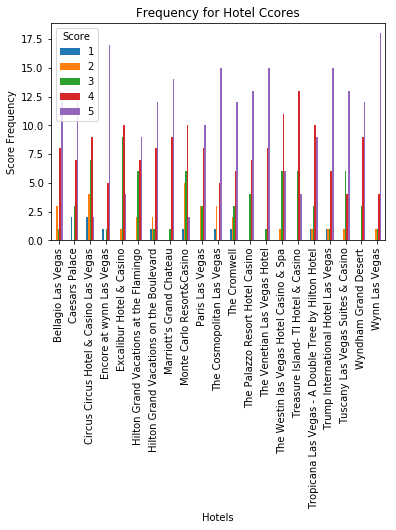

In [14]:
#Bar Plot
%matplotlib inline
pd.crosstab(vegas.Hotel_name,vegas.Score).plot(kind='bar')
plt.title('Frequency for Hotel Ccores')
plt.xlabel('Hotels')
plt.ylabel('Score Frequency')

The Bar graph from above suggest that guests rating seems to be biased. Guests are satisfied with most hotels, as the  majority of ratings are towards the top rating of 4, 5 as shown in red and purple line.


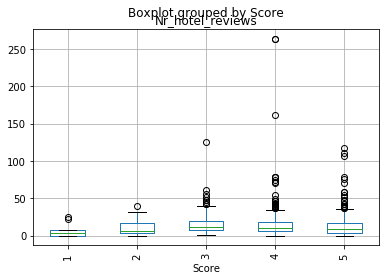

In [15]:
#Boxplot for member years
vegas.boxplot(column='Nr_hotel_reviews', by='Score', rot=90)
plt.show()

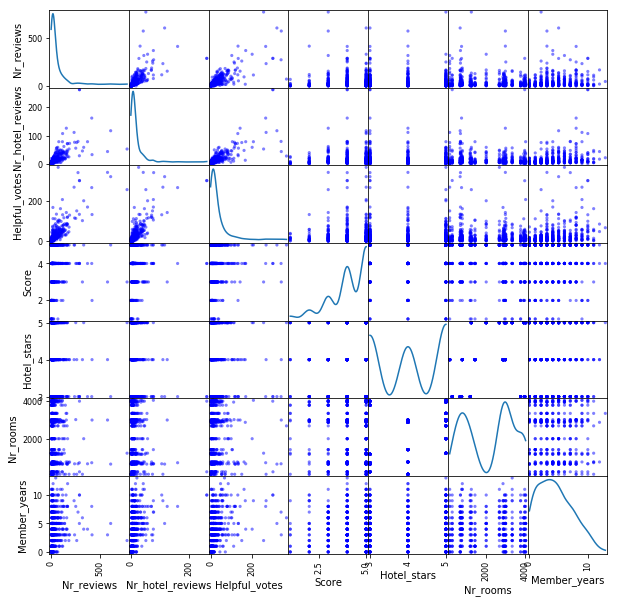

In [16]:
#Scatterplot
pd.plotting.scatter_matrix(vegas,
                           figsize=(10,10), 
                           diagonal='kde', 
                           s=40,                            
                           alpha=0.5,
                           #marker='*',
                           color='blue')
plt.show()

The Correlation heatmap and correlation we can analyse that there are no correlation between the variables. Hence we have to use multiple variables for Modeling.

,Nr_reviews,Nr_hotel_reviews,Helpful_votes,Score,Hotel_stars,Nr_rooms,Member_years
Nr_reviews,1.000000,0.655006,0.790646,-0.023622,-0.071714,-0.136200,0.117751
Nr_hotel_reviews,0.655006,1.000000,0.764278,0.014239,-0.109051,-0.128631,0.292923
Helpful_votes,0.790646,0.764278,1.000000,0.016049,-0.037104,-0.098840,0.269738
Score,-0.023622,0.014239,0.016049,1.000000,0.156884,-0.081212,0.072942
Hotel_stars,-0.071714,-0.109051,-0.037104,0.156884,1.000000,0.421151,0.034080
Nr_rooms,-0.136200,-0.128631,-0.098840,-0.081212,0.421151,1.000000,-0.017445
Member_years,0.117751,0.292923,0.269738,0.072942,0.034080,-0.017445,1.000000


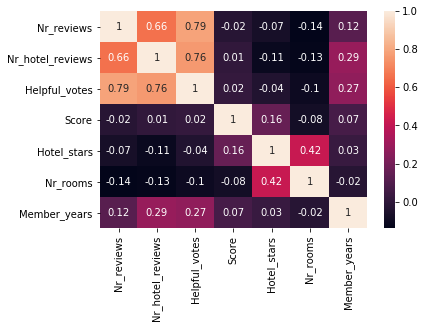

In [17]:
correlation_matrix = vegas.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

vegas.corr()

In [18]:
import pandas as pd
def changeyesno(x):
    if x=="YES":
        return 1
    else:
        return 0
    
def changestr(str):
    x=0
    for l in str:
        x += ord(l)
    return int(x)

vegas['Casino']=vegas['Casino'].apply(lambda x : changeyesno(x))
vegas['Gym']=vegas['Gym'].apply(lambda x : changeyesno(x))
vegas['Pool']=vegas['Pool'].apply(lambda x : changeyesno(x))
vegas['Tennis_court']=vegas['Tennis_court'].apply(lambda x : changeyesno(x))
vegas['Casino']=vegas['Casino'].apply(lambda x : changeyesno(x))
vegas['Free_internet']=vegas['Free_internet'].apply(lambda x : changeyesno(x))
vegas['Spa']=vegas['Spa'].apply(lambda x : changeyesno(x))


Str_columns = ['Period_of_stay', 'Hotel_name', 'User_country',
         'Traveler_type', 'User_continent', 'Review_month', 'Review_weekday']

for y in Str_columns:
    vegas[y]=vegas[y].apply(lambda x: changestr(x))

## Predictive Model (Classification) - Logistic Regression Model Fitting
Goal is to predict score based on the variables like Helpful_votes, Hotel_stars, Period_of_stay etc. Logistic Regression helps to build the model using the training set, and then check the accuracy using the testing set.

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(vegas.loc[:,vegas.columns!='Score'], vegas['Score'], 
                                                    test_size=0.3, random_state=0)

The code snippet above creates testing and training datasets for a predictor and also outcome variables

Below, Y predict predicts the output of the data using the f1-score, precision, recall

In [20]:
import sklearn 
model = sklearn.linear_model.LogisticRegression()
#y,X = dmatrices('Useful_reviews ~ Score + Hotel_stars + Period_of_stay', data=vegas)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred = model.predict(x_train)
print(sklearn.metrics.classification_report(y_test, y_predict))
print(sklearn.metrics.classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.10      0.11      0.11        18
           4       0.43      0.23      0.30        56
           5       0.55      0.81      0.65        68

   micro avg       0.46      0.46      0.46       151
   macro avg       0.22      0.23      0.21       151
weighted avg       0.42      0.46      0.42       151

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        23
           3       0.44      0.26      0.33        54
           4       0.45      0.27      0.34       108
           5       0.55      0.88      0.67       158

   micro avg       0.52      0.52      0.52       352
   macro avg       0.29      0.28      0.27       352
weighted avg       0.45      0.52      0.46       352



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification

The best prediction score achived using Logistic Regression with all features is 46% which is low. The data does not seem to be biased. 

Based on the y predict score we can see that scores are skewed towards 4,5 score.

In [21]:
print(y_predict)

[5 4 5 5 5 4 5 5 5 5 5 4 4 5 5 5 5 5 5 3 5 5 5 5 3 5 3 5 5 5 5 5 5 5 5 5 5
 5 5 5 3 4 5 5 4 3 5 5 5 3 4 5 4 5 5 4 4 5 5 5 4 5 5 4 4 5 3 5 5 4 5 4 3 5
 5 5 5 5 5 5 3 5 5 4 5 5 5 5 5 4 5 4 5 5 5 5 3 5 3 5 4 5 4 5 3 4 5 5 4 5 4
 3 5 3 5 5 5 3 5 4 3 2 5 5 4 5 3 4 4 5 5 5 5 3 3 5 5 5 5 5 5 4 5 4 5 4 5 5
 5 3 5]


Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
#confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)
#print(confusion_matrix1)

[[ 0  0  1  0  1]
 [ 0  0  3  1  3]
 [ 0  0  2  7  9]
 [ 0  1 10 13 32]
 [ 0  0  4  9 55]]


In [23]:
((y_test)==y_predict).sum()/len(y_predict)

0.46357615894039733

In [24]:
vegas['Useful_reviews'] = (vegas['Helpful_votes']/vegas['Nr_reviews']  > 0.2).astype(np.float32)
vegas['Useful_reviews'].mean()

0.9463220834732056

Based on the y predict score gives 46% prediction. We can see that scores are skewed towards 4,5 score. 
Hence, the data seems to be biased. Confusion matrix provides an output.

In [25]:
from imblearn.over_sampling import SMOTE


In [26]:
y_train.value_counts()

5    158
4    108
3     54
2     23
1      9
Name: Score, dtype: int64

In [27]:

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(Xtrain,np.array(ytrain).ravel())

NameError: name 'Xtrain' is not defined

In [ ]:
print(ytrain)

In [ ]:
np.bincount(y_train)

In [ ]:
((y_train)==(y_predict)).sum()/len(np.array(y_predict))

In [ ]:
print(type(y_predict))

In [ ]:
y_train